In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set()

# Importing Data

In [5]:
uber_df = pd.read_csv('./Uber_request_data.csv')

In [6]:
print('Shape of the dataframe :')
print(uber_df.shape)
init_rows,init_cols = uber_df.shape

Shape of the dataframe :
(6745, 6)


In [7]:
print(uber_df.info())
#Null values are present in Driver_id and Drop timestamp columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


# Data Cleaning

## Date format 

In [8]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


The time format is non consistent in the `request timestamp and Drop timestamp columns`. Hence converting the format of the columns to datetime to get data into consistent format

In [9]:
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'],dayfirst = True)
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'],dayfirst = True)

In [10]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [11]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


## Null values

In [12]:
print(uber_df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [13]:
uber_df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [11]:
uber_df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [12]:
uber_df[uber_df['Status']!= 'Trip Completed']['Status'].value_counts().sum()

3914

We can see that `Driver id` is null when there are `no cars available` and `Drop timestamp` is null whenever trips have not been completed

## Check for duplicates

In [14]:
print(uber_df['Request id'].duplicated().sum())
print('There are no duplicate records with request id')

0
There are no duplicate records with request id


## Check if request timestamp is greater than Drop timestamp

In [15]:
print(len(uber_df[uber_df['Request timestamp'] >= uber_df['Drop timestamp']]))
print('There are no such records')

0
There are no such records


# Creating Derived variables

In [17]:
uber_df['Trip_time'] = uber_df.apply(lambda row:(row['Drop timestamp']-row['Request timestamp']).seconds/60,axis =1)
uber_df['Request_date'] = uber_df['Request timestamp'].dt.date
uber_df['Drop_date'] = uber_df['Drop timestamp'].dt.date
uber_df['Request_time'] = uber_df['Request timestamp'].dt.time
uber_df['Drop_time'] = uber_df['Drop timestamp'].dt.time
uber_df['Request_day'] = uber_df['Request timestamp'].dt.dayofweek
uber_df['Drop_day'] = uber_df['Drop timestamp'].dt.dayofweek
uber_df['Request_hour'] = uber_df['Request timestamp'].dt.hour
uber_df['Drop_hour'] = uber_df['Drop timestamp'].dt.hour

In [18]:
uber_df.loc[(uber_df['Request_hour']>=0)&(uber_df['Request_hour'] < 5),'Request_time_slot'] = 'Mid_Night'
uber_df.loc[(uber_df['Request_hour']>=5)&(uber_df['Request_hour'] < 9),'Request_time_slot'] = 'Early_Morning'
uber_df.loc[(uber_df['Request_hour']>=9)&(uber_df['Request_hour'] < 13),'Request_time_slot'] = 'Morning'
uber_df.loc[(uber_df['Request_hour']>=13)&(uber_df['Request_hour'] < 17),'Request_time_slot'] = 'Afternoon'
uber_df.loc[(uber_df['Request_hour']>=17)&(uber_df['Request_hour'] < 21),'Request_time_slot'] = 'Evening'
uber_df.loc[(uber_df['Request_hour']>=21)&(uber_df['Request_hour'] < 24),'Request_time_slot'] = 'Night'

In [19]:
uber_df.loc[(uber_df['Drop_hour']>=0)&(uber_df['Drop_hour'] < 5),'Drop_time_slot'] = 'Mid_Night'
uber_df.loc[(uber_df['Drop_hour']>=5)&(uber_df['Drop_hour'] < 9),'Drop_time_slot'] = 'Early_Morning'
uber_df.loc[(uber_df['Drop_hour']>=9)&(uber_df['Drop_hour'] < 13),'Drop_time_slot'] = 'Morning'
uber_df.loc[(uber_df['Drop_hour']>=13)&(uber_df['Drop_hour'] < 17),'Drop_time_slot'] = 'Afternoon'
uber_df.loc[(uber_df['Drop_hour']>=17)&(uber_df['Drop_hour'] < 21),'Drop_time_slot'] = 'Evening'
uber_df.loc[(uber_df['Drop_hour']>=21)&(uber_df['Drop_hour'] < 24),'Drop_time_slot'] = 'Night'

In [20]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Trip_time          2831 non-null   float64       
 7   Request_date       6745 non-null   object        
 8   Drop_date          2831 non-null   object        
 9   Request_time       6745 non-null   object        
 10  Drop_time          2831 non-null   object        
 11  Request_day        6745 non-null   int64         
 12  Drop_day           2831 non-null   float64       
 13  Request_hour       6745 non-null   int64         
 14  Drop_hou

# Analysis and Plots

## Assumptions

1. Each request in the given data is consider as a request from unique user. Hence the demand will be equal to sum of all the requests.<br>
`Reasons:`
In the given data frame there are 6 columns present and with the given columns there is no proper way of finding if the user with unsuccessful trip has given another request or not. 
2. Supply is equal to the total number of trips completed
3. Generally every cab driver waits at the airport after trip completion for new trip.<br>
`Reasons:`
It is a reasonale assumption because the average trip time from airport to city is about 50 mins and hence nobody likes to go that far empty

4. Timeslots are assumed as below.<br>
        12AM to 4AM - Mid_night
        5AM to 8AM - Early_Morning
        9AM to 12PM - Morning
        1PM to 4PM - Afternoon
        5PM to 8PM - Evening
        9PM to 12AM - Night

In [21]:
#average trip times 
uber_df.groupby('Pickup point')['Trip_time'].mean()

Pickup point
Airport    52.238495
City       52.568384
Name: Trip_time, dtype: float64

## Number of Requests based on pickup point

In [22]:
print('Number of request from different pickup points:')
print(uber_df['Pickup point'].value_counts())
print('*'*60)
print(uber_df['Pickup point'].value_counts().transform(lambda x:round(100*x/x.sum())))

Number of request from different pickup points:
City       3507
Airport    3238
Name: Pickup point, dtype: int64
************************************************************
City       52.0
Airport    48.0
Name: Pickup point, dtype: float64


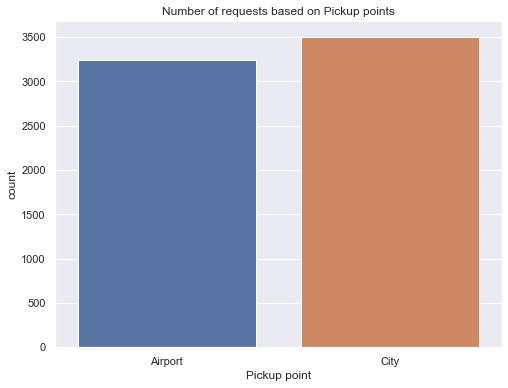

In [23]:
plt.figure(num = 1,figsize = (8,6))
sns.countplot(uber_df['Pickup point'])
plt.title('Number of requests based on Pickup points')
plt.show()

## Observations:
It shows that the total number of trips from `city to airport is 52%` and from `airport to city is 48%.` __There is no significant difference in the requests made from both the pickup points.__

## Distribution of Requests across time for all the days

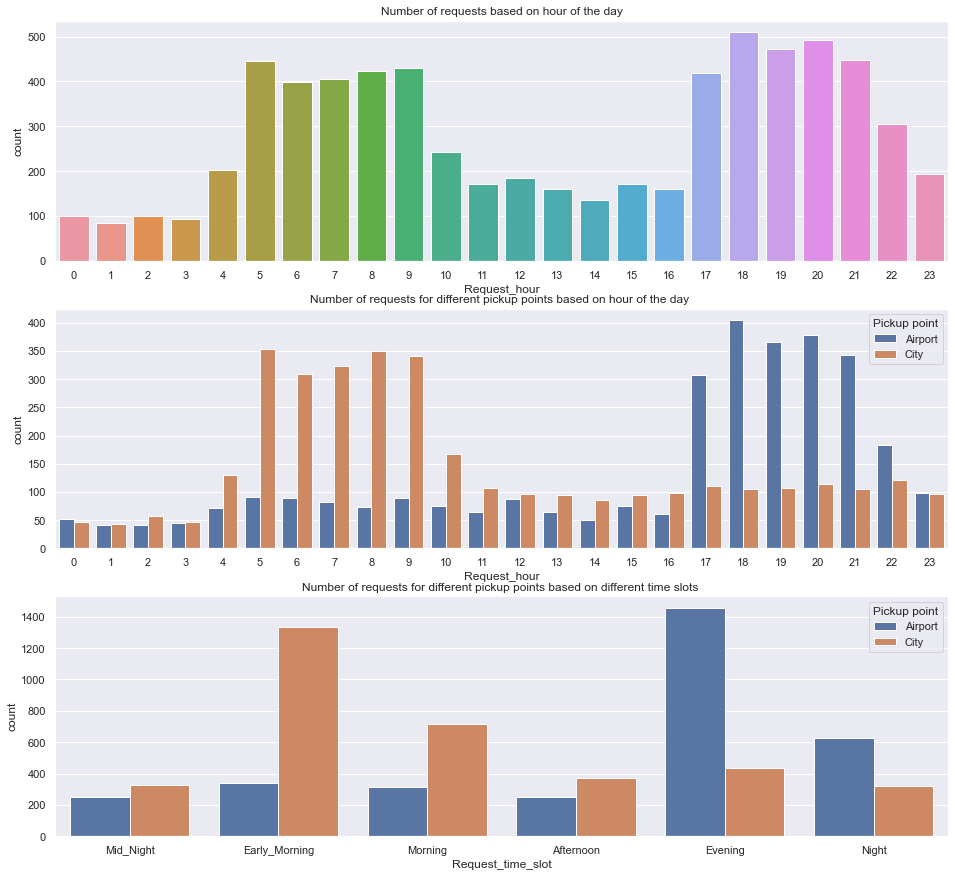

In [24]:
order_list = ['Mid_Night','Early_Morning','Morning','Afternoon','Evening','Night']
plt.figure(num = 2,figsize = (16,15))
plt.subplot(3,1,1)
sns.countplot(uber_df['Request_hour'])
plt.title('Number of requests based on hour of the day')
plt.subplot(3,1,2)
sns.countplot(uber_df['Request_hour'],hue=uber_df['Pickup point'])
plt.title('Number of requests for different pickup points based on hour of the day ')
plt.subplot(3,1,3)
sns.countplot(uber_df['Request_time_slot'],hue=uber_df['Pickup point'],order = order_list)
plt.title('Number of requests for different pickup points based on different time slots ')
plt.show()

## Observations:
For the above figures we can see that __Number of request peaks twice in a day__, once in the mornings and once in the evenings,furthur we can see that the __`demand in the mornings is for the trips from city to airport and from airport to city in the evenings`__

## Effect of day of week on Requests

In [25]:
uber_df.groupby('Request_day')['Request id'].count()

Request_day
0    1367
1    1307
2    1337
3    1353
4    1381
Name: Request id, dtype: int64

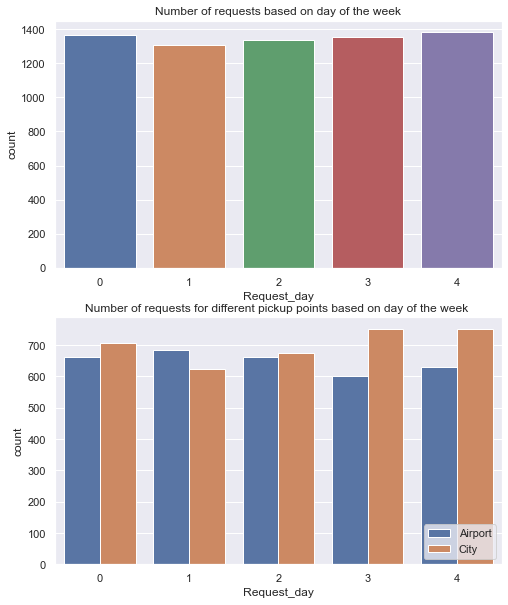

In [26]:
plt.figure(num = 2,figsize = (8,10))
plt.subplot(2,1,1)
sns.countplot(uber_df['Request_day'])
plt.title('Number of requests based on day of the week')
plt.subplot(2,1,2)
sns.countplot(uber_df['Request_day'],hue=uber_df['Pickup point'])
plt.title('Number of requests for different pickup points based on day of the week ')
plt.legend(loc = 4)
plt.show()

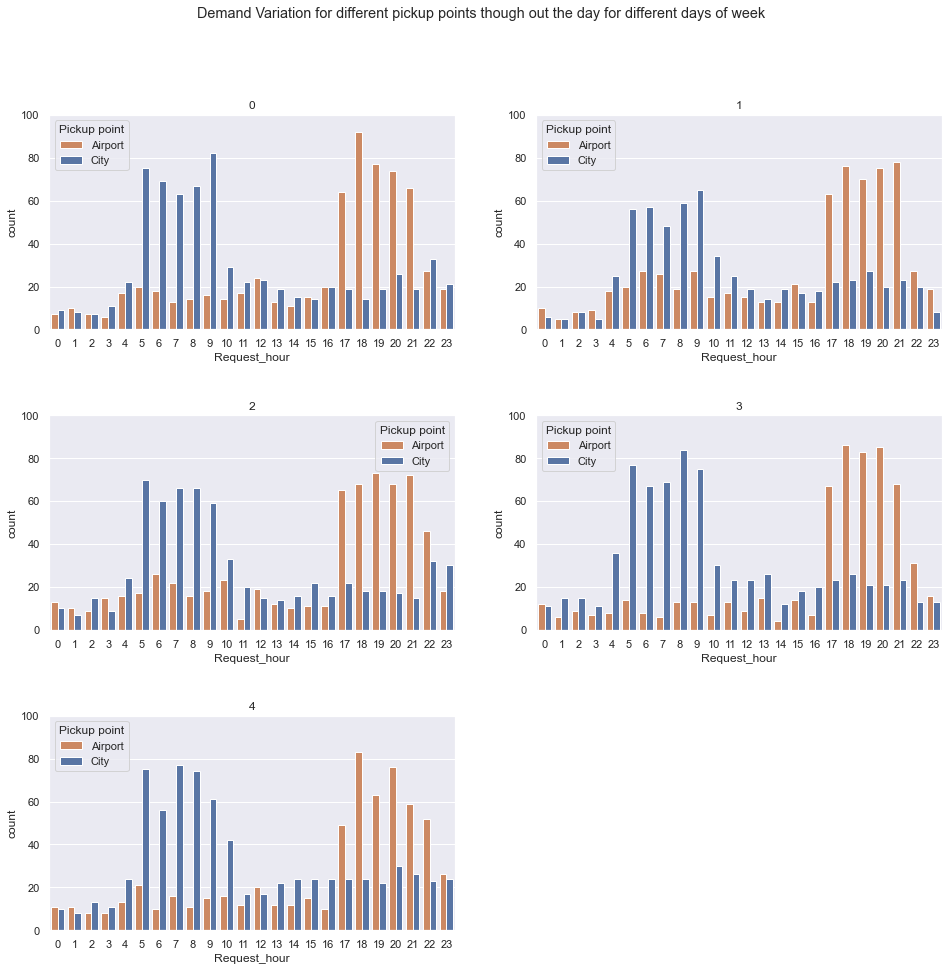

In [27]:
i = 1
hue_order = ['Airport','City']
size = len(uber_df['Request_day'].unique().tolist())
plt.figure(figsize=(16,5*3))
plt.suptitle('Demand Variation for different pickup points though out the day for different days of week')
palette = {'City':'C0','Airport':'C1'}
for day in (uber_df['Request_day'].unique().tolist()):
    plt.subplot(3,2,i)
    ax = sns.countplot(uber_df[uber_df['Request_day']==day]['Request_hour'],hue=uber_df[uber_df['Request_day']==day]['Pickup point'],palette = palette,hue_order = hue_order)
    ax.set_title(day)
    plt.ylim([0,100])
    plt.subplots_adjust(hspace = 0.4)
    i = i+1
plt.show()

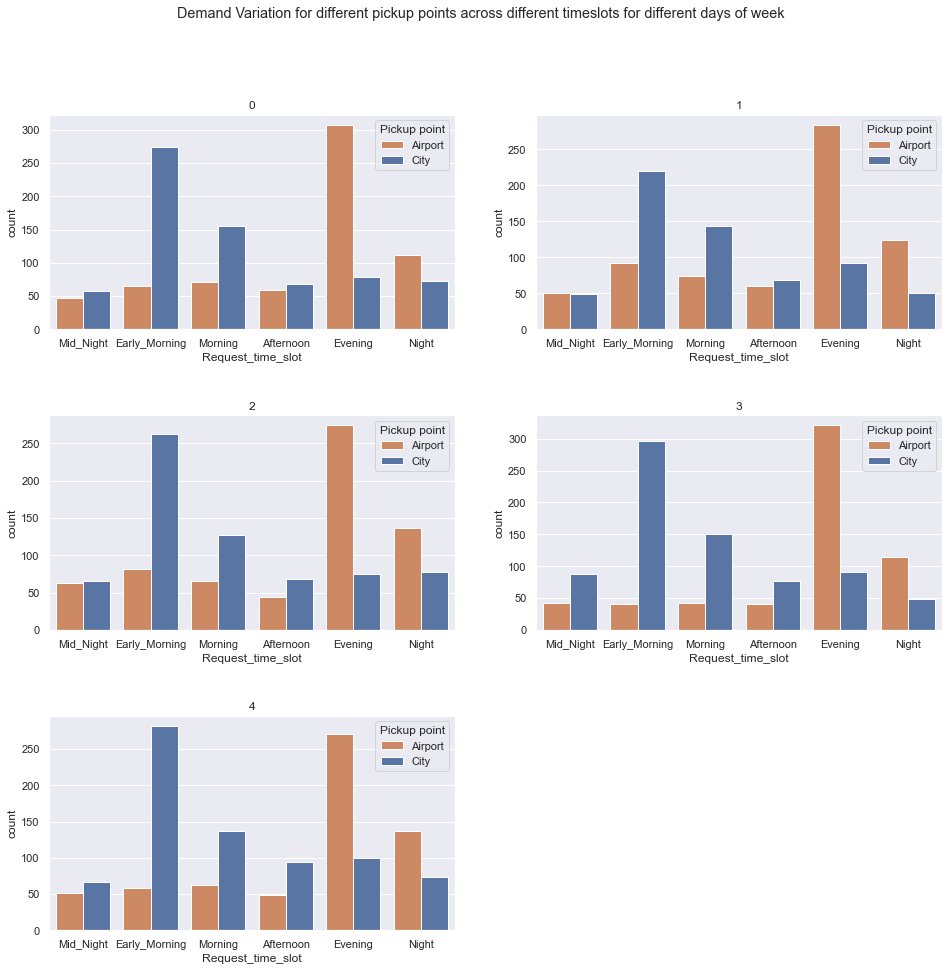

In [28]:
order_list = ['Mid_Night','Early_Morning','Morning','Afternoon','Evening','Night']
hue_order = ['Airport','City']
i = 1
size = len(uber_df['Request_day'].unique().tolist())
plt.figure(figsize=(16,5*3))
plt.suptitle('Demand Variation for different pickup points across different timeslots for different days of week')
palette = {'City':'C0','Airport':'C1'}
for day in (uber_df['Request_day'].unique().tolist()):
    plt.subplot(3,2,i)
    ax = sns.countplot(uber_df[uber_df['Request_day']==day]['Request_time_slot'],hue=uber_df[uber_df['Request_day']==day]['Pickup point'],palette = palette,order = order_list,hue_order = hue_order) 
    ax.set_title(day)
    #plt.ylim([0,100])
    plt.subplots_adjust(hspace = 0.4)
    i = i+1
plt.show()

## Observations:
The total demand seems to follow the similar trend of peaking twice every day. The day of the week doesnt seem to have significant effect on the number of requests.

## Trip status Analysis

In [29]:
print('Number of trips for different trip status:')
print(uber_df['Status'].value_counts())
print('*'*60)
print('percentage of total:')
print(round(100*uber_df['Status'].value_counts()/len(uber_df)))

Number of trips for different trip status:
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
************************************************************
percentage of total:
Trip Completed       42.0
No Cars Available    39.0
Cancelled            19.0
Name: Status, dtype: float64


We can see that only __42% of the requests have been completed__ and the remaning __58% requests have not been attended__

In [30]:
print('Pickup point Vs Trip Status:\n')
print(pd.crosstab(uber_df['Pickup point'],uber_df['Status']),'\n')
print('Pickup point Vs Trip Status (in percentage):\n')
print(pd.crosstab(uber_df['Pickup point'],uber_df['Status']).transform(lambda x:round(100*x/x.sum())))

Pickup point Vs Trip Status:

Status        Cancelled  No Cars Available  Trip Completed
Pickup point                                              
Airport             198               1713            1327
City               1066                937            1504 

Pickup point Vs Trip Status (in percentage):

Status        Cancelled  No Cars Available  Trip Completed
Pickup point                                              
Airport            16.0               65.0            47.0
City               84.0               35.0            53.0


We can see that __majority of the cancelled trips are from city to airport(about 84%)__ where as __majority of cases where cars are not available is from airport to city(about 65%)__

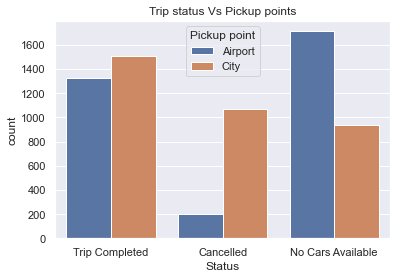

In [31]:
plt.figure()
sns.countplot(x='Status',hue = 'Pickup point',data = uber_df)
plt.title('Trip status Vs Pickup points')
plt.show()

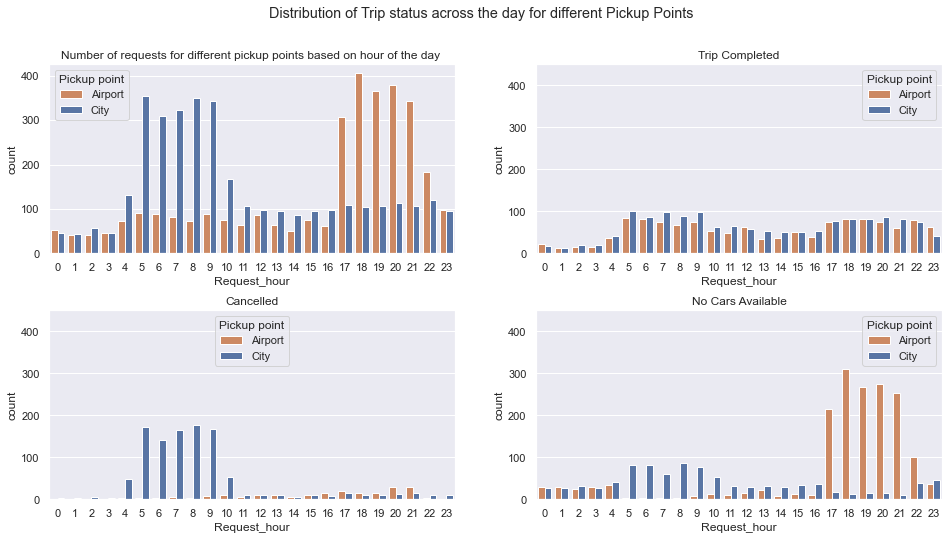

In [32]:
i = 2
plt.figure(figsize=(16,4*2))
palette = {'City':'C0','Airport':'C1'}
hue_order = ['Airport','City']
plt.suptitle('Distribution of Trip status across the day for different Pickup Points')
plt.subplot(2,2,1)
sns.countplot(uber_df['Request_hour'],hue=uber_df['Pickup point'],palette = palette)
plt.title('Number of requests for different pickup points based on hour of the day ')
for status in (uber_df['Status'].unique().tolist()):
    plt.subplot(2,2,i)
    ax = sns.countplot(uber_df[uber_df['Status']==status]['Request_hour'],hue=uber_df[uber_df['Status']==status]['Pickup point'],palette = palette,hue_order = hue_order)
    ax.set_title(status)
    plt.ylim([0,450])
    plt.subplots_adjust(hspace = 0.3)
    i = i+1
plt.show()

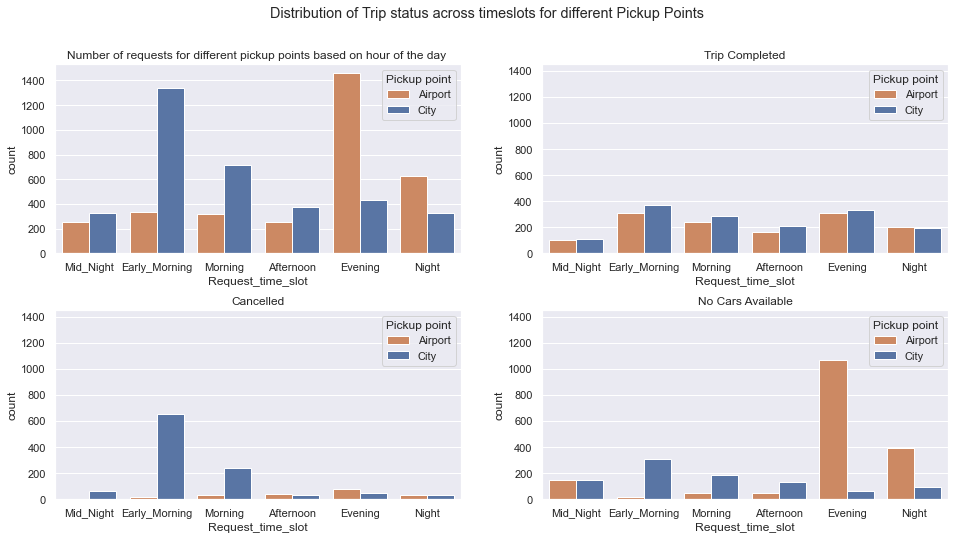

In [33]:
order_list = ['Mid_Night','Early_Morning','Morning','Afternoon','Evening','Night']
i = 2
plt.figure(figsize=(16,4*2))
hue_order = ['Airport','City']
palette = {'City':'C0','Airport':'C1'}
plt.suptitle('Distribution of Trip status across timeslots for different Pickup Points')
plt.subplot(2,2,1)
sns.countplot(uber_df['Request_time_slot'],hue=uber_df['Pickup point'],palette = palette,order = order_list)
plt.title('Number of requests for different pickup points based on hour of the day ')
for status in (uber_df['Status'].unique().tolist()):
    plt.subplot(2,2,i)
    ax = sns.countplot(uber_df[uber_df['Status']==status]['Request_time_slot'],hue=uber_df[uber_df['Status']==status]['Pickup point'],palette = palette,order=order_list,hue_order = hue_order)
    ax.set_title(status)
    plt.ylim([0,1450])
    plt.subplots_adjust(hspace = 0.3)
    i = i+1
plt.show()

## Observations:
From the above analysis we can see that the main points of concern are below:
    1. There are high cancellations in the morning from city to airport, which is generally a high demand timeslot
    2. There are large number of cases where cabs are not avaiable from airport to city in the evenings which is   also a high demand timeslot

# Demand and Supply Analysis

As per assumptions we are considering that demand is equal to the total number of requests made

In [34]:
# Demand DataFrame
demand_df = uber_df.groupby(['Request_time_slot','Request_day','Pickup point'])['Request id'].count().reset_index().rename(columns = {'Request id':'Demand'}).copy()

In [35]:
# Supply Dataframe
supply_df = uber_df[uber_df['Status'] == 'Trip Completed'].groupby(['Request_time_slot','Request_day','Pickup point'])['Request id'].count().reset_index().rename(columns = {'Request id':'Supply'}).copy()

In [36]:
# Merging DataFrames
demand_supply_df = demand_df.merge(supply_df,on=['Request_time_slot','Pickup point','Request_day'])

In [37]:
# finding Gap between demand and supply
demand_supply_df['Gap'] = demand_supply_df['Demand']-demand_supply_df['Supply']

In [38]:
demand_supply_df.head()

,Request_time_slot,Request_day,Pickup point,Demand,Supply,Gap
0,Afternoon,0,Airport,59,39,20
1,Afternoon,0,City,68,44,24
2,Afternoon,1,Airport,60,39,21
3,Afternoon,1,City,68,39,29
4,Afternoon,2,Airport,44,25,19


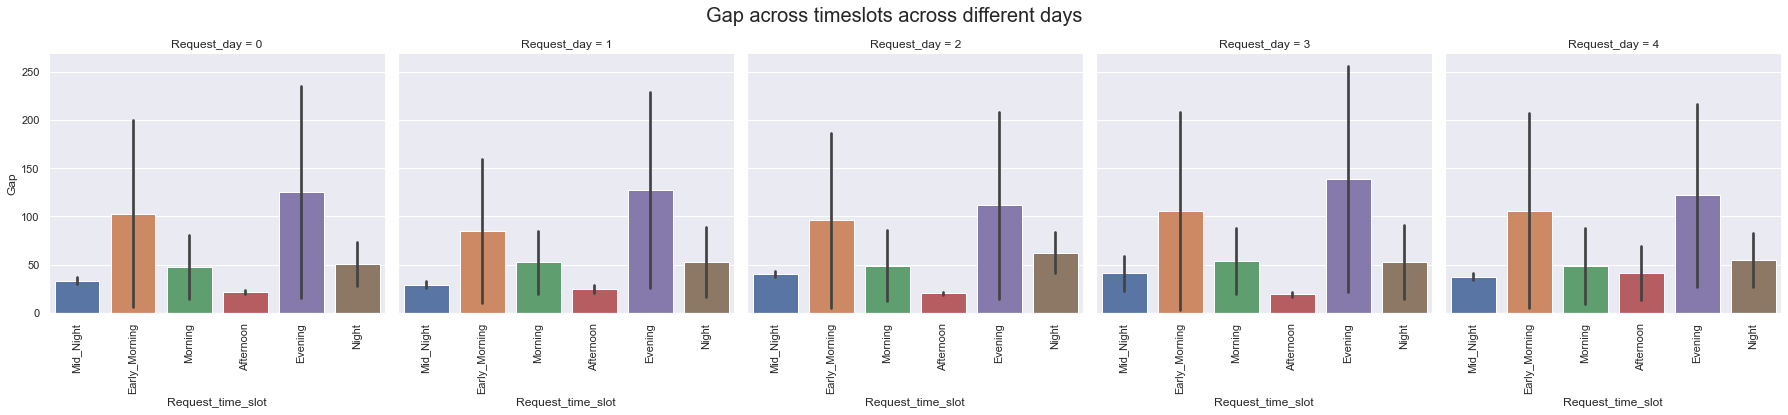

In [39]:
order_list = ['Mid_Night','Early_Morning','Morning','Afternoon','Evening','Night']
hue_order = ['Airport','City']
g= sns.catplot(x = 'Request_time_slot',y= 'Gap',col = 'Request_day',kind = 'bar',data = demand_supply_df,order = order_list,hue_order = hue_order)
g.set_xticklabels(rotation = 'vertical')
g.fig.suptitle('Gap across timeslots across different days',size = 20,va='top')
plt.subplots_adjust(top=0.85)
g.fig.show()

In [40]:
print('Average gap across different timeslots for all the days:','\n')
print(demand_supply_df.groupby('Request_time_slot')['Gap'].sum().transform(lambda x:x/5))

Average gap across different timeslots for all the days: 

Request_time_slot
Afternoon         51.2
Early_Morning    198.2
Evening          250.2
Mid_Night         72.8
Morning          100.8
Night            109.6
Name: Gap, dtype: float64


In [41]:
print('Average gap across different timeslots for all the days:','\n')
print(demand_supply_df.groupby(['Request_time_slot','Pickup point'])['Gap'].mean())

Average gap across different timeslots for all the days: 

Request_time_slot  Pickup point
Afternoon          Airport          18.0
                   City             33.2
Early_Morning      Airport           5.8
                   City            192.4
Evening            Airport         229.0
                   City             21.2
Mid_Night          Airport          30.0
                   City             42.8
Morning            Airport          15.2
                   City             85.6
Night              Airport          84.2
                   City             25.4
Name: Gap, dtype: float64


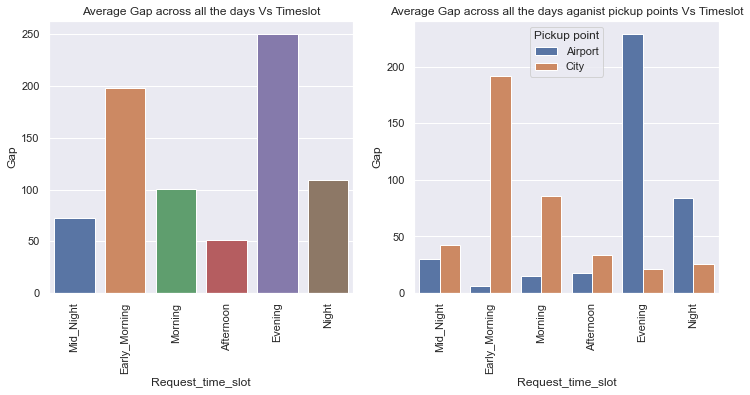

In [42]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Average Gap across all the days Vs Timeslot')
sns.barplot(x = 'Request_time_slot',y= 'Gap',order = order_list,data = demand_supply_df.groupby('Request_time_slot')['Gap'].sum().transform(lambda x:x/5).reset_index())
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
plt.title('Average Gap across all the days aganist pickup points Vs Timeslot')
sns.barplot(x = 'Request_time_slot',y= 'Gap',hue ='Pickup point',order = order_list,data = demand_supply_df.groupby(['Request_time_slot','Pickup point'])['Gap'].mean().reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

## Observations:
1. From the first plot, which shows the Gap for different timeslots across all the days we can see that the Gap remains more or less the same across different days.
2. The time slots with maximum Gap are Early_morning and Evening which are very large when compared to other timeslots
3. In the Early_morning timeslot the trip from city to airport is the troubled route, which is due to large number of cancellations as we have seen earlier
4. In the Evening timeslot the trip from airport to city is the troubled route, which is due to large number of requests which are declined due to non availability of cabs, as we have seen earlier

# Reasons for Demand-Supply Gap:

In [43]:
print(demand_df.groupby(['Request_time_slot','Pickup point'])['Demand'].mean())

Request_time_slot  Pickup point
Afternoon          Airport          50.4
                   City             74.8
Early_Morning      Airport          67.4
                   City            267.0
Evening            Airport         291.4
                   City             87.2
Mid_Night          Airport          50.6
                   City             65.0
Morning            Airport          63.0
                   City            142.8
Night              Airport         124.8
                   City             64.6
Name: Demand, dtype: float64


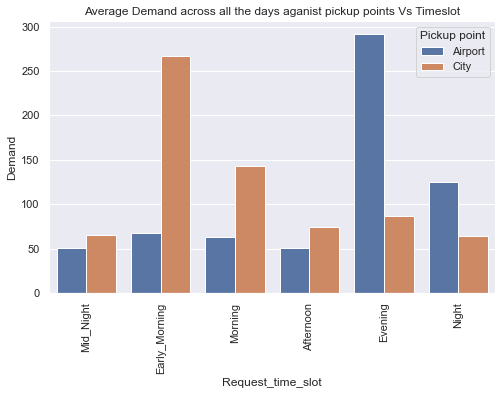

In [44]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Request_time_slot',y= 'Demand',hue ='Pickup point',order = order_list,data = demand_df.groupby(['Request_time_slot','Pickup point'])['Demand'].mean().reset_index())
plt.title('Average Demand across all the days aganist pickup points Vs Timeslot')
plt.xticks(rotation = 'vertical')
plt.show()

## Observations:
1. Issue: High Cancellations in Mornings in the route from City to Airport <br>
`Reasons:`
    - The Number of rides that are available from airport to City are much lower. This may be because of lower number of passengers travelling in the flights which are scheduled in afternoon
    - The number of cabs travelling from city to airport in the same slot is much higher, therefore the chance is getting a ride from airport to city is much lower, therefore the driver has to either come back empty or stay at airport waiting for a ride
    - Since average travel time from airport to city is 50mins (approx), going back empty is not profitable and same is the case with high wait times
    - Hence drivers prefer to attend other routes which are more profitable to them, resulting in high cancellations
2. Issue: Low availability of cabs in the evenings at airport <br>
`Reasons:`
    - The supply of cabs to airports until evening is much lower due to less passengers travelling to airport
    - Since the supply is very low when compared to the demand at the airport, the case of low availability of cabs is very prevalent at airport in the evenings


## Recomendations:
1. Cab drivers can be penalised whenever they cancel ride to airport after certain number of times.This number can be arrived from the data of cancellations, we can see how frequently a driver is cancelling a trip to airport and based on that a max_cap on cancellations can be calculated. This penality will help in reducing the number of cancellations from city to airport.
2. Introducing surge pricing for the rides which have higher probability of being cancelled. Higher pricing means that driver earns more money for same cost, which can a incentive for the drivers for accepting the rides
3. Since we know that airport is a high demand region in the evenings, uber can try to inform drivers before hand so that drivers can reach airport for the high demand times. We can identify if there are any low demand and high supply regions around airport and inform these drivers about the demand and surge pricing so that the higher price and lower waiting times can become incentives and increase the supply,so that the demand can be meet at the airport.